In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier

In [26]:
dataset = pd.read_csv("parking_occupancy_features.csv")

In [28]:
dataset.head(5)

,day_of_week,hour_of_day,is_holiday,special_event,pressure_sensor,ir_sensor,ultrasonic_sensor,magnetic_sensor,camera_detection,rfid_sensor,...,gas_sensor,motion_sensor,weight_sensor,proximity_sensor,nearby_traffic,air_quality_index,noise_level_db,prev_hour_occupied,weather,occupied
0,3,0,0,0,0.672703,0.571996,0.393636,0.648257,0.038799,0.720268,...,0.974318,0.073175,0.499670,0.004402,22,79.969783,61.023800,0,sunny,0
1,3,0,0,0,0.796681,0.805432,0.473436,0.172386,0.186773,0.687283,...,0.017173,0.089478,0.746747,0.000330,24,66.636272,45.557837,1,rainy,0
2,3,0,0,1,0.250468,0.760161,0.854547,0.872395,0.831246,0.095754,...,0.947652,0.651974,0.562667,0.472263,19,64.772353,76.587637,1,cloudy,1
3,3,0,0,0,0.624874,0.153900,0.340004,0.613116,0.766768,0.922572,...,0.368677,0.486941,0.083303,0.029294,24,81.490955,77.148968,0,sunny,1
4,3,0,0,0,0.571746,0.149249,0.869650,0.157204,0.350643,0.568472,...,0.010090,0.790415,0.185580,0.974533,9,109.267807,67.337064,0,sunny,0


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day_of_week         1000 non-null   int64  
 1   hour_of_day         1000 non-null   int64  
 2   is_holiday          1000 non-null   int64  
 3   special_event       1000 non-null   int64  
 4   pressure_sensor     1000 non-null   float64
 5   ir_sensor           1000 non-null   float64
 6   ultrasonic_sensor   1000 non-null   float64
 7   magnetic_sensor     1000 non-null   float64
 8   camera_detection    1000 non-null   float64
 9   rfid_sensor         1000 non-null   float64
 10  temperature_sensor  1000 non-null   float64
 11  humidity_sensor     1000 non-null   float64
 12  vibration_sensor    1000 non-null   float64
 13  light_sensor        1000 non-null   float64
 14  gas_sensor          1000 non-null   float64
 15  motion_sensor       1000 non-null   float64
 16  weight_

In [32]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day_of_week,1000.0,3.280000,0.449224,3.000000,3.000000,3.000000,4.000000,4.000000
hour_of_day,1000.0,9.450000,6.884395,0.000000,4.000000,8.000000,15.000000,23.000000
is_holiday,1000.0,0.097000,0.296106,0.000000,0.000000,0.000000,0.000000,1.000000
special_event,1000.0,0.154000,0.361129,0.000000,0.000000,0.000000,0.000000,1.000000
pressure_sensor,1000.0,0.490375,0.286489,0.000653,0.241901,0.484279,0.737541,0.999558
ir_sensor,1000.0,0.494105,0.286810,0.000031,0.244974,0.494598,0.739993,0.997749
ultrasonic_sensor,1000.0,0.498464,0.289195,0.006184,0.249380,0.490403,0.739852,0.999350
magnetic_sensor,1000.0,0.493309,0.289734,0.001428,0.240222,0.484643,0.756464,0.999461
camera_detection,1000.0,0.482371,0.284914,0.000241,0.235989,0.483991,0.714466,0.998905
rfid_sensor,1000.0,0.486497,0.282235,0.000243,0.249384,0.478701,0.715905,0.996013


In [34]:
dataset.nunique()

day_of_week              2
hour_of_day             24
is_holiday               2
special_event            2
pressure_sensor       1000
ir_sensor             1000
ultrasonic_sensor     1000
magnetic_sensor       1000
camera_detection      1000
rfid_sensor           1000
temperature_sensor    1000
humidity_sensor       1000
vibration_sensor      1000
light_sensor          1000
gas_sensor            1000
motion_sensor         1000
weight_sensor         1000
proximity_sensor      1000
nearby_traffic          32
air_quality_index     1000
noise_level_db        1000
prev_hour_occupied       2
weather                  3
occupied                 2
dtype: int64

In [36]:
dataset.isnull().sum()

day_of_week           0
hour_of_day           0
is_holiday            0
special_event         0
pressure_sensor       0
ir_sensor             0
ultrasonic_sensor     0
magnetic_sensor       0
camera_detection      0
rfid_sensor           0
temperature_sensor    0
humidity_sensor       0
vibration_sensor      0
light_sensor          0
gas_sensor            0
motion_sensor         0
weight_sensor         0
proximity_sensor      0
nearby_traffic        0
air_quality_index     0
noise_level_db        0
prev_hour_occupied    0
weather               0
occupied              0
dtype: int64

In [38]:
dataset.shape

(1000, 24)

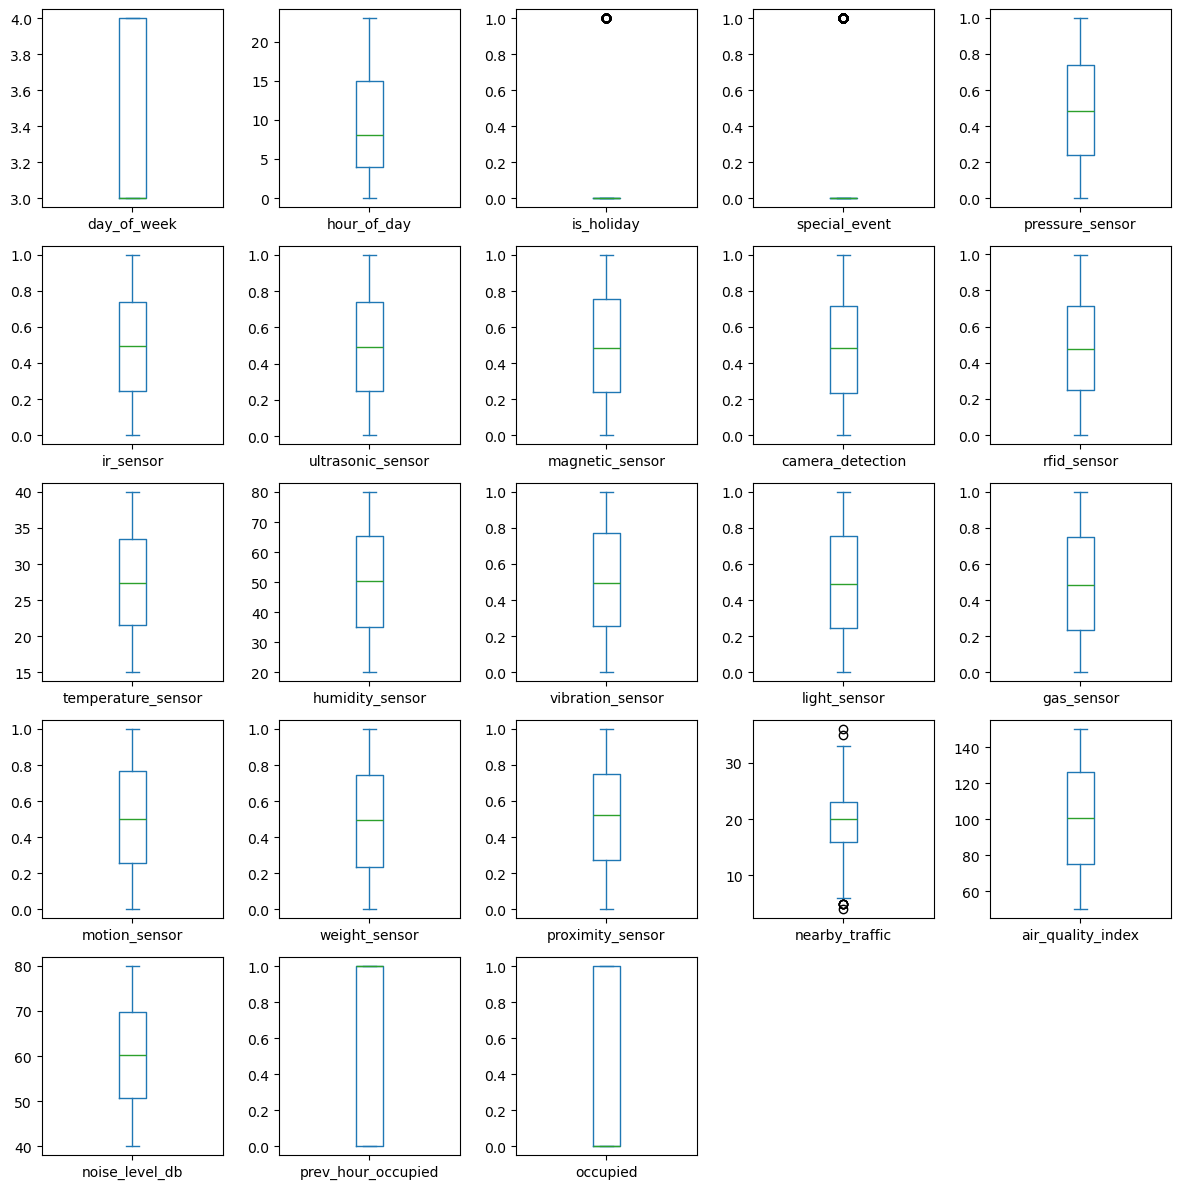

In [40]:
dataset.plot(kind="box", figsize=(12,12), layout=(5,5), sharex=False, subplots=True)
plt.tight_layout()

In [41]:
q1 = dataset["nearby_traffic"].quantile(0.25)
q3 = dataset["nearby_traffic"].quantile(0.75)
IQR = q3-q1
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
dataset = dataset[(dataset["nearby_traffic"] > min_range) & (dataset["nearby_traffic"] < max_range)]

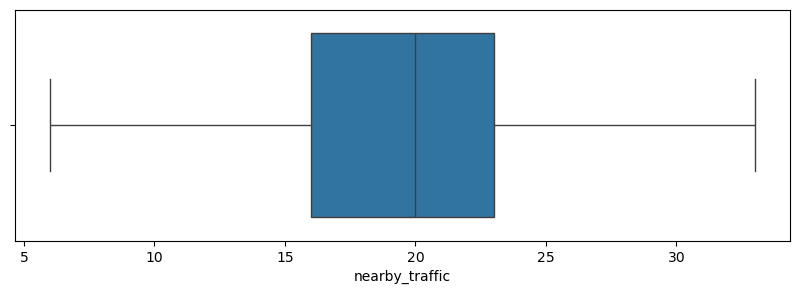

In [44]:
plt.figure(figsize=(10,3))
sns.boxplot(x="nearby_traffic", data=dataset)
plt.show()

In [47]:
encoding = LabelEncoder()
dataset["weather"] = encoding.fit_transform(dataset["weather"])

/var/folders/s7/p1d6kl217wn7_y52f1sn0d580000gn/T/ipykernel_77886/1045811111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["weather"] = encoding.fit_transform(dataset["weather"])


In [49]:
x = dataset.drop("occupied", axis=1)
y = dataset["occupied"]

In [51]:
dataset["occupied"].value_counts()

occupied
0    709
1    283
Name: count, dtype: int64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
scaling = StandardScaler()
x_train_ss = scaling.fit_transform(x_train)
x_test_ss = scaling.transform(x_test)

In [61]:
sf0=SequentialFeatureSelector(DecisionTreeClassifier(),k_features=23,forward=True)
sf0.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(23, 23), scoring='accuracy')

In [63]:
sf0.k_feature_names_

('day_of_week',
 'hour_of_day',
 'is_holiday',
 'special_event',
 'pressure_sensor',
 'ir_sensor',
 'ultrasonic_sensor',
 'magnetic_sensor',
 'camera_detection',
 'rfid_sensor',
 'temperature_sensor',
 'humidity_sensor',
 'vibration_sensor',
 'light_sensor',
 'gas_sensor',
 'motion_sensor',
 'weight_sensor',
 'proximity_sensor',
 'nearby_traffic',
 'air_quality_index',
 'noise_level_db',
 'prev_hour_occupied',
 'weather')

In [65]:
sf0.k_score_

0.9666971219735038

In [67]:
cross_val=cross_val_score(DecisionTreeClassifier(),x,y,
                          cv=StratifiedKFold(n_splits=30))

In [69]:
cross_val.sort
cross_val*100

array([100.        ,  97.05882353, 100.        ,  96.96969697,
       100.        ,  96.96969697, 100.        , 100.        ,
       100.        ,  96.96969697,  96.96969697, 100.        ,
       100.        ,  96.96969697,  90.90909091, 100.        ,
        96.96969697, 100.        , 100.        ,  96.96969697,
       100.        , 100.        ,  96.96969697, 100.        ,
        96.96969697,  93.93939394,  96.96969697,  96.96969697,
        93.93939394,  96.96969697])

In [71]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

In [75]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [77]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy: 0.9647321073162965


In [81]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=10,
                             max_features=None, min_samples_leaf=4,
                             min_samples_split=2, splitter="best")
tree.fit(x_train_ss,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [83]:
tree.score(x_train_ss,y_train)*100, tree.score(x_test_ss,y_test)*100

(99.87389659520807, 94.9748743718593)

In [85]:
cf3=confusion_matrix(y_test,tree.predict(x_test_ss))
cf3

array([[140,   5],
       [  5,  49]])

In [244]:
cross_val=cross_val_score(tree,x,y,cv=StratifiedKFold(n_splits=30))

In [87]:
sf01=SequentialFeatureSelector(RandomForestClassifier(n_estimators=30),k_features=23,forward=True)
sf01.fit(x,y)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=30),
                          k_features=(23, 23), scoring='accuracy')

In [89]:
sf01.k_feature_names_

('day_of_week',
 'hour_of_day',
 'is_holiday',
 'special_event',
 'pressure_sensor',
 'ir_sensor',
 'ultrasonic_sensor',
 'magnetic_sensor',
 'camera_detection',
 'rfid_sensor',
 'temperature_sensor',
 'humidity_sensor',
 'vibration_sensor',
 'light_sensor',
 'gas_sensor',
 'motion_sensor',
 'weight_sensor',
 'proximity_sensor',
 'nearby_traffic',
 'air_quality_index',
 'noise_level_db',
 'prev_hour_occupied',
 'weather')

In [91]:
sf01.k_score_

0.8991929343688139

In [95]:
cross_val1=cross_val_score(RandomForestClassifier(n_estimators=30),x,y,
                          cv=StratifiedKFold(n_splits=30))

In [97]:
cross_val1.sort
cross_val1*100

array([ 91.17647059,  94.11764706,  93.93939394,  90.90909091,
        90.90909091,  96.96969697,  90.90909091,  96.96969697,
       100.        ,  93.93939394,  84.84848485,  90.90909091,
        87.87878788,  90.90909091,  84.84848485,  90.90909091,
        90.90909091,  93.93939394,  96.96969697,  90.90909091,
        87.87878788,  93.93939394,  93.93939394,  93.93939394,
        90.90909091,  84.84848485,  87.87878788,  90.90909091,
        84.84848485,  96.96969697])

In [210]:
params_forest = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [212]:
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid=params_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [214]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9533954303001353


In [228]:
forest = RandomForestClassifier(bootstrap=False, criterion="entropy",
                               max_depth=20, max_features="sqrt",
                               min_samples_leaf=4, min_samples_split=2,
                               n_estimators=300, class_weight='balanced',
                               random_state=42)
forest.fit(x_train_ss,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=20, min_samples_leaf=4,
                       n_estimators=300, random_state=42)

In [230]:
forest.score(x_train_ss,y_train)*100, forest.score(x_test_ss,y_test)*100

(100.0, 95.97989949748744)

In [232]:
cf4=confusion_matrix(y_test,forest.predict(x_test_ss))
cf4

array([[141,   4],
       [  4,  50]])

In [156]:
sf=SequentialFeatureSelector(xgb,k_features=23,forward=True)
sf.fit(x,y)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  feature_weights=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None, ...),
                          k_features=(23, 23), scoring='accuracy')

In [158]:
sf.k_feature_names_

('day_of_week',
 'hour_of_day',
 'is_holiday',
 'special_event',
 'pressure_sensor',
 'ir_sensor',
 'ultrasonic_sensor',
 'magnetic_sensor',
 'camera_detection',
 'rfid_sensor',
 'temperature_sensor',
 'humidity_sensor',
 'vibration_sensor',
 'light_sensor',
 'gas_sensor',
 'motion_sensor',
 'weight_sensor',
 'proximity_sensor',
 'nearby_traffic',
 'air_quality_index',
 'noise_level_db',
 'prev_hour_occupied',
 'weather')

In [160]:
sf.k_score_

0.9878889396477335

In [236]:
cross_val3=cross_val_score(XGBClassifier(),x,y,cv=StratifiedKFold(n_splits=30))

In [238]:
cross_val3.sort
cross_val3*100

array([100.        ,  97.05882353, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ,  93.93939394, 100.        ,
        96.96969697, 100.        , 100.        , 100.        ,
       100.        , 100.        ,  96.96969697, 100.        ,
       100.        , 100.        ,  96.96969697,  96.96969697,
        93.93939394,  96.96969697])

In [244]:
param_boost = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [254]:
xgbst=XGBClassifier()
grid_search_bst = GridSearchCV(xgbst, param_grid=param_boost, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_bst.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [256]:
print("Best Parameters:", grid_search_bst.best_params_)
print("Best Accuracy:", grid_search_bst.best_score_)

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.7}
Best Accuracy: 0.989937106918239


In [280]:
xgb = XGBClassifier(colsample_bytree=0.7, gamma=0.2,
                   learning_rate=0.2, max_depth=3,
                   n_estimators=200, reg_alpha=0.1,
                   reg_lambda=2, subsample=0.7)
xgb.fit(x_train_ss,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [282]:
xgb.score(x_train_ss,y_train)*100, xgb.score(x_test_ss,y_test)*100

(100.0, 98.49246231155779)

In [274]:
cf5=confusion_matrix(y_test,xgb.predict(x_test_ss))
cf5

array([[144,   1],
       [  2,  52]])

In [336]:
pr0=precision_score(y_test,xgb.predict(x_test_ss))
recall0=recall_score(y_test,xgb.predict(x_test_ss))
f_score0=f1_score(y_test,xgb.predict(x_test_ss))
print("precision:",pr0)
print("recall:",recall0)
print("f1_score:",f_score0)

precision: 0.9811320754716981
recall: 0.9629629629629629
f1_score: 0.9719626168224299


In [340]:
y_pred = xgb.predict(x_test_ss)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9849
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       145
           1       0.98      0.96      0.97        54

    accuracy                           0.98       199
   macro avg       0.98      0.98      0.98       199
weighted avg       0.98      0.98      0.98       199



In [298]:
parameters=[("DecisionTree",tree),("RandomForest",forest),("XGB",xgb)]

In [304]:
ensemble=VotingClassifier(parameters)
ensemble.fit(x_train_ss,y_train)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     min_samples_leaf=4)),
                             ('RandomForest',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     min_samples_leaf=4,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=No...
                                            feature_weights=None, gamma=0.2,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [306]:
ensemble.score(x_train_ss,y_train)*100,ensemble.score(x_test_ss,y_test)*100

(100.0, 96.98492462311557)

In [328]:
cf6=confusion_matrix(y_test,ensemble.predict(x_test_ss))
cf6

array([[141,   4],
       [  2,  52]])

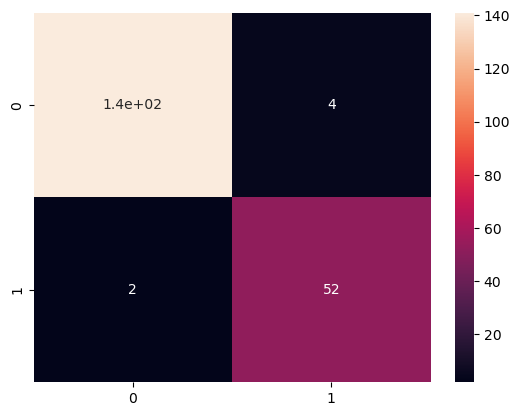

In [330]:
sns.heatmap(cf6,annot=True)
plt.show()

In [332]:
pr1=precision_score(y_test,ensemble.predict(x_test_ss))
recall=recall_score(y_test,ensemble.predict(x_test_ss))
f_score=f1_score(y_test,ensemble.predict(x_test_ss))
print("precision:",pr1)
print("recall:",recall)
print("f1_score:",f_score)

precision: 0.9285714285714286
recall: 0.9629629629629629
f1_score: 0.9454545454545454


In [338]:
y_pred = ensemble.predict(x_test_ss)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9698
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.93      0.96      0.95        54

    accuracy                           0.97       199
   macro avg       0.96      0.97      0.96       199
weighted avg       0.97      0.97      0.97       199



In [347]:
predict={"DecisionTree":tree.predict(x_test_ss),
         "RandomForest":forest.predict(x_test_ss),
         "XGBClassifier":xgb.predict(x_test_ss)}

In [362]:
data=pd.DataFrame(predict)
data.head(5)

,DecisionTree,RandomForest,XGBClassifier
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,0,0,0


In [391]:
x.columns

Index(['day_of_week', 'hour_of_day', 'is_holiday', 'special_event',
       'pressure_sensor', 'ir_sensor', 'ultrasonic_sensor', 'magnetic_sensor',
       'camera_detection', 'rfid_sensor', 'temperature_sensor',
       'humidity_sensor', 'vibration_sensor', 'light_sensor', 'gas_sensor',
       'motion_sensor', 'weight_sensor', 'proximity_sensor', 'nearby_traffic',
       'air_quality_index', 'noise_level_db', 'prev_hour_occupied', 'weather'],
      dtype='object')

In [373]:
pd.set_option('display.max_columns', None)
dataset.iloc[20:23]

,day_of_week,hour_of_day,is_holiday,special_event,pressure_sensor,ir_sensor,ultrasonic_sensor,magnetic_sensor,camera_detection,rfid_sensor,temperature_sensor,humidity_sensor,vibration_sensor,light_sensor,gas_sensor,motion_sensor,weight_sensor,proximity_sensor,nearby_traffic,air_quality_index,noise_level_db,prev_hour_occupied,weather,occupied
20,3,0,0,1,0.285758,0.411304,0.666927,0.417984,0.550691,0.497869,21.813944,30.622598,0.702783,0.400219,0.582121,0.819438,0.272385,0.489540,21,64.473293,74.304700,0,0,0
21,3,0,0,0,0.432767,0.240532,0.435396,0.853285,0.816793,0.841809,36.788642,21.711201,0.042006,0.576922,0.866874,0.275923,0.832062,0.696376,22,80.645773,41.518019,1,2,0
22,3,0,1,1,0.685444,0.672384,0.953120,0.856154,0.959592,0.801352,27.124807,74.558249,0.906873,0.854917,0.953292,0.350702,0.083724,0.110443,13,126.586599,46.035122,1,2,1


In [379]:
prediction = pd.DataFrame([[3, 0, 0, 1, 0.285758, 0.411304, 0.666927, 0.417984,
                            0.550691, 0.497869, 21.813944, 30.622598, 0.702783,
                            0.400219, 0.582121, 0.819438, 0.272385, 0.489540,
                            21, 64.473293, 74.304700, 0, 0]], columns=x.columns)
prediction_ss = scaling.transform(prediction)
ensemble.predict(prediction_ss)

array([0])

In [381]:
prediction1 = pd.DataFrame([[3, 0, 1, 1, 0.685444, 0.672384, 0.953120, 0.856154,
                             0.959592, 0.801352, 27.124807, 74.558249, 0.906873,
                             0.854917, 0.953292, 0.350702, 0.083724, 0.110443,
                             13, 126.586599, 46.035122, 1, 2]], columns=x.columns)
prediction_ss1 = scaling.transform(prediction1)
ensemble.predict(prediction_ss1)

array([1])

In [387]:
import joblib
joblib.dump(ensemble, 'ensemble.pkl')

['ensemble.pkl']

In [389]:
joblib.dump(scaling, 'scaler.pkl')

['scaler.pkl']

THANK YOU